# Machine Learning 1 - Algorithme K-Means

Étant donné que l'esclavage c'est immoral, déléguons les tâches pénibles et répétitives aux ordinateurs, voulez-vous ? 

J'ai entrepri de classer mes 1000000 photos de pingouins car ça faisait fouilli sur le bureau de mon Windows98. J'ai donc décidé d'écrire un ptit programme pour le faire à ma place. Je me suis donc retrouvé à chercher "Comment connaître le sexe d'un animal dans un fichier .jpeg en C#" sur StackOverflow. Peu de résultats. Puis, une illumination : le Machine Learning ! La solution idéale pour ce genre de problèmes qui demandent un certain niveau d'abstraction des concepts de pingouins mâles, femelles, gorfous et autres manchots.

Le Machine Learning peut se décomposer en 2 phases :
* **La phase d'apprentissage ** : faire en sorte que la machine découvre les liens entre des données d'entrée et ce qu'on attend qu'elle produise. 
* **L'application de ces nouvelles connaissances** : on met la machine face à de nouvelles données d'entrée à partir desquelles on voudrait produire une sortie. 

Il existe plusieurs types d'apprentissage : supervisé ou non, par renforcement... Aujourd'hui on va faire du learning non supervisé ! Cela signifie que l'on ne possède pas la correction de l'exercice que l'on demande à la machine de faire. Cependant on est quand même capable de juger de la qualité de sa réponse.

Un apprentissage non supervisé est adapté à des problèmes NP-Complet : des problèmes pour lesquels on a pas encore trouvé d'algorithme non-déterministe mais qui possède un certificat polynommial, pour parler crument. En gros des problèmes très coûteux à résoudre mais si une solution est trouvée, on peut vérifier qu'elle soit bonne relativement facilement.

Le Machine Learning permet aujourd'hui de trouver des solutions à de tels problèmes sans garantir l'optimalité et en sachant que cette solution ne sera pas universelle (pour un problème donné) puisque fortement dépendante des données utilisées pour l'apprentissage.

## Qu'est-ce que le clustering ?

Il s'agit de regrouper des données en groupe au sein desquels toutes les données seront les plus similaires possible. Il s'agit donc d'un problème NP-Complet puisqu'aujourd'hui on ne sait pas trouver de tels groupes sans explorer toutes les possibilités possibles.

C'est typiquement ce que je cherche à faire avec mes photos de pingouins.

## K-Means dans tout ça ?

K-Means est un algorithme de clustering. Il est très simple à comprendre et à implémenter. 

Où est le piège me direz-vous ? 

Hé bien vous devez avoir une idée du nombre de clusters qu'il va vous falloir, il s'agit du K de K-Means. En soit le nombre exact n'est pas à connaître à l'avance, mais vous devez quand même l'approximer en amont car quoiqu'il arrive, l'algorithme vous donnera K clusters.

De plus, vos données devront être caractérisées par un vecteur numérique, le vecteur : $\begin{pmatrix} bec jaune \\ plumes soyeuses \\ cri melodique \end{pmatrix}$ n'est pas valide, vous devez réfléchir à comment exprimer vos données avec des nombres, par exemple $\begin{pmatrix} 0.8 \\ 0.27 \\ 440 \end{pmatrix}$ où 0.8 représente l'intensité du jaune, 0.27 l'indice de soyosité et 440 la fréquence dominante après analyse du cri par transformée de Fourier. 

L'algorithme K-Means va aussi créer K nouvelles données (au début aléatoires) qui seront les centres de chaque clusters, calculés grâce à la moyenne de tous les points de leurs clusters respectifs, d'où le Means. 

## Un peu de terminologie

* **une feature** : une caractéristique d'une donnée (l'intensité lumineuse, le BPM, le nombre de lettres, ...)
* **une instance** : un vecteur contenant toutes les features d'une donnée.
* **un centroid** : le centre d'un cluster, **On peut donc simplement définir un cluster par son centroid.**

Pour cet article, nous utiliserons des instances aléatoires (sans rélle signification donc) de 2 features chacune afin de pouvoir les visualiser sur un graphique 2D par pur soucis pédagogique. Bien évidemment cet algo peut s'appliquer pour n'importe quel nombre de features et d'instances.

## L'algo

Il est tout simple, le voici :

1. Choisir k centroids parmis les instances.
2. Assigner chaque instance au centroid le plus proche (donc construction des clusters)
4. Calcul des nouveaux centroids en faisant la moyenne des instances de son cluster  
5. Si les centroids n'ont pas été modifiés pendant la dernière itération, on retourne ces centroids, sinon, aller à l'étape 2

**ATTENTION** : le k choisi pour l'algorithme doit être inférieur au nombre d'instances.

## Le code

Il nécessite d'être un minimum familier avec Python et Numpy, pas non plus besoin d'être expert. Si vous ne connaissez ni l'un, ni l'autre, sachez qu'ils sont sont très utilisés dans les domaines du Machine Learning et du Data Mining (mais pas que), donc penchez vous dessus, ça vaut le coup. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt #Pour visualiser les données
%matplotlib inline

In [29]:
#Initialisation de 200 instances possédant chacune 2 features de manière aléatoire
n_instances = 200
n_features = 2

#Nos instances seront représentées par une matrice de taille (n_instances, n_features) 
instances = np.random.normal(size=(int(n_instances/4), n_features), loc=(-1,1), scale=(0.6,0.6))
instances = np.vstack((instances, np.random.normal(size=(int(n_instances/4), n_features), loc=(1,1), scale=(0.6,0.6))))
instances = np.vstack((instances, np.random.normal(size=(int(n_instances/4), n_features), loc=(1,-1), scale=(0.6,0.6))))
instances = np.vstack((instances, np.random.normal(size=(int(n_instances/4), n_features), loc=(-1,-1), scale=(0.6,0.6))))

#Nous cherchons à former 4 clusters
k = 4

In [24]:
def find_cluster(instance, centroids): 
    #Retourne l'indice du centroid le plus proche
    return np.argmin([np.linalg.norm(centroid - instance) for centroid in centroids])

In [25]:
def kmeans(k, instances, centroids=None):
    
    n_instances, n_features = instances.shape
    
    #Si jamais on souhaite relancer l'algo à partir de centroids pré-existant
    #car on a ajouté de nouvelles données depuis la dernière fois que l'on a 
    #lancé l'algo par exemple, ou pour reprendre depuis un checkpoint ....
    if centroids == None:
        #Initialisation des centroids parmis les instances
        centroids = np.array(instances[np.random.choice(n_instances, k)])
    
    #Historique des centroids
    #utile si on veut voir l'évolution de l'algorithme
    centroids_history = []
    
    #Tant que les centroids sont modifiés
    modified = True
    while modified:
        #Ajout dans l'historique
        centroids_history.append(centroids)
        
        #Construction pour des clusters pour cette itération
        clusters = {i : [] for i in range(k)} 
        for instance in instances:
            cluster = find_cluster(instance, centroids)
            clusters[cluster].append(instance)
        
        #Calcul des nouveaux centroids
        new_centroids = np.zeros(centroids.shape)
        for i in range(k):
            #Conversion des clusters en np.array
            #Pas indispensable mais facilite l'utilisation
            clusters[i] = np.array(clusters[i])
            #Update
            new_centroids[i] = np.mean(clusters[i], axis=0) 
        
        if np.array_equal(new_centroids, centroids):
            modified = False
        
        centroids = new_centroids
    
    #On retourne les centroids
    #Les clusters sont facultatifs étant donné qu'on peut les reconstruire
    #à partir des centroids, mais vu qu'on les a entre les mains, soyons généreux
    return centroids, centroids_history, clusters

In [30]:
#Application de l'algo à nos instances aléatoires
centroids, centroids_history, clusters = kmeans(k, instances)

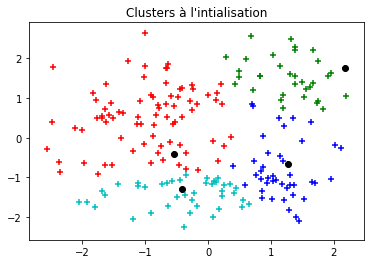

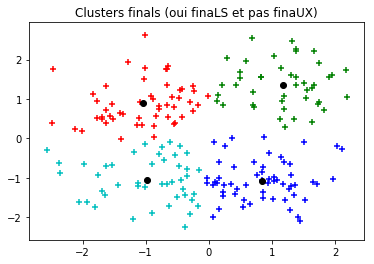

In [31]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

#Plot des clusters à l'intialisation
plt.figure()
plt.title("Clusters à l'intialisation")
for instance in instances:
    cluster = find_cluster(instance, centroids_history[0])
    plt.scatter(instance[0], instance[1], color=colors[cluster], marker='+')
plt.scatter(centroids_history[0][:, 0], centroids_history[0][:, 1], color='k')

#Plot des clusters à la fin de l'agorithme k-means
plt.figure()
plt.title("Clusters finals (oui finaLS et pas finaUX)")
for idx in range(k):
    plt.scatter(clusters[idx][:, 0], clusters[idx][:, 1], color=colors[idx], marker='+')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k')

In [28]:
#Imaginons que l'on veuille connaître le cluster d'une nouvelle instance
instance = np.random.random((n_features))
print("Instance : ", instance)
cluster = find_cluster(instance, centroids)

print("Cluster de l'instance : %d , sa couleur est donc %s" % (cluster, colors[cluster]))

Instance :  [ 0.69217688  0.94823896]
Cluster de l'instance : 3 , sa couleur est donc c


## Conclusion

On voit bien une évolution des clusters et on est même capables d'attribuer un groupe à de nouvelles données. Quoi ? Vous êtes pas impressionnés ? Bon c'est vrai qu'on a utilisé des données aléatoires et donc vides de sens. Dans les prochains articles nous utiliserons des données bien concrètes (peut-être des musiques, peut-être des images). On va calculer leur features et même utiliser un Neural Network pour exploiter encore plus la puissance du Machine Learning.

Stay Tuned !